In [1]:
pwd

'C:\\Users\\Ashok'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("sales_data.csv")
df.head()

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1,1200,1200
1,102,Bob,2024/03/02,Mouse,2,25,50
2,103,Charlie,"March 3, 2024",Keyboard,1,45,45
3,104,David,2024-03-04,Monitor,1,200,200
4,105,NaN,2024-03-05,Laptop,NaN,1200,1200


In [14]:
df.tail()

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
5,106,Frank,2024/03/06,Mouse,3,25,75
6,107,Grace,03-07-2024,Keyboard,Four,45,45
7,108,Hannah,2024-03-08,Monitor,1,200,200
8,109,Ian,2024-03-09,Laptop,2,1200,2400
9,109,Jack,2024-03-09,Mouse,3,25,Seventy Five


In [22]:
df.shape

(10, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       10 non-null     int64 
 1   Customer Name  9 non-null      object
 2   Date           10 non-null     object
 3   Product        10 non-null     object
 4   Quantity       9 non-null      object
 5   Price          10 non-null     int64 
 6   Total          10 non-null     object
dtypes: int64(2), object(5)
memory usage: 692.0+ bytes


In [18]:
#checking null/missing values
df.isnull()

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [24]:
# checking total null/missing values
df.isnull().sum()

Order ID         0
Customer Name    1
Date             0
Product          0
Quantity         1
Price            0
Total            0
dtype: int64

In [26]:
#dropping null values
df.dropna()

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1,1200,1200
1,102,Bob,2024/03/02,Mouse,2,25,50
2,103,Charlie,"March 3, 2024",Keyboard,1,45,45
3,104,David,2024-03-04,Monitor,1,200,200
5,106,Frank,2024/03/06,Mouse,3,25,75
6,107,Grace,03-07-2024,Keyboard,Four,45,45
7,108,Hannah,2024-03-08,Monitor,1,200,200
8,109,Ian,2024-03-09,Laptop,2,1200,2400
9,109,Jack,2024-03-09,Mouse,3,25,Seventy Five


In [28]:
#checking duplicates
df.duplicated().sum()

0

In [32]:
#checking data types
df.dtypes

Order ID          int64
Customer Name    object
Date             object
Product          object
Quantity         object
Price             int64
Total            object
dtype: object

In [34]:
df['Quantity'].isnull().sum()

1

In [40]:
df['Quantity']=df['Quantity'].astype(int)

ValueError: cannot convert float NaN to integer

In [44]:
#to convert nan to integer/float
df['Quantity'] = pd.to_numeric(df['Quantity'],errors = 'coerce')

In [48]:
# so now the quantity is converted to float
df['Quantity'].dtype

dtype('float64')

In [50]:
df['Quantity']

0    1.0
1    2.0
2    1.0
3    1.0
4    NaN
5    3.0
6    NaN
7    1.0
8    2.0
9    3.0
Name: Quantity, dtype: float64

In [54]:
# we can either drop or fill in nan values
df['Quantity'].dropna()

0    1.0
1    2.0
2    1.0
3    1.0
5    3.0
7    1.0
8    2.0
9    3.0
Name: Quantity, dtype: float64

In [60]:
df['Total'].dtype

dtype('O')

In [66]:
#converting another incorrect datatype
df['Total'] = pd.to_numeric(df['Total'],errors = 'coerce')

In [68]:
df['Total'].isnull().sum()

1

In [70]:
df['Total'].dropna()

0    1200.0
1      50.0
2      45.0
3     200.0
4    1200.0
5      75.0
6      45.0
7     200.0
8    2400.0
Name: Total, dtype: float64

In [116]:
df.head(10)

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1.0,1200,1200.0
1,102,Bob,2024/03/02,Mouse,2.0,25,50.0
2,103,Charlie,"March 3, 2024",Keyboard,1.0,45,45.0
3,104,David,2024-03-04,Monitor,1.0,200,200.0
7,108,Hannah,2024-03-08,Monitor,1.0,200,200.0
8,109,Ian,2024-03-09,Laptop,2.0,1200,2400.0


In [126]:
# filling nan values
df['Quantity'] = df['Quantity'].fillna(0)
df

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1.0,1200,1200.0
1,102,Bob,2024/03/02,Mouse,2.0,25,50.0
2,103,Charlie,"March 3, 2024",Keyboard,1.0,45,45.0
3,104,David,2024-03-04,Monitor,1.0,200,200.0
4,108,Hannah,2024-03-08,Monitor,1.0,200,200.0
5,109,Ian,2024-03-09,Laptop,2.0,1200,2400.0


In [128]:
# filling string nan values
df['Customer Name'] = df['Customer Name'].fillna('Unknown')
df

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1.0,1200,1200.0
1,102,Bob,2024/03/02,Mouse,2.0,25,50.0
2,103,Charlie,"March 3, 2024",Keyboard,1.0,45,45.0
3,104,David,2024-03-04,Monitor,1.0,200,200.0
4,108,Hannah,2024-03-08,Monitor,1.0,200,200.0
5,109,Ian,2024-03-09,Laptop,2.0,1200,2400.0


In [132]:
#filling total using mean
df['Total'] = df['Total'].fillna(df['Total'].mean())
df

,Order ID,Customer Name,Date,Product,Quantity,Price,Total
0,101,Alice,2024-03-01,Laptop,1.0,1200,1200.0
1,102,Bob,2024/03/02,Mouse,2.0,25,50.0
2,103,Charlie,"March 3, 2024",Keyboard,1.0,45,45.0
3,104,David,2024-03-04,Monitor,1.0,200,200.0
4,108,Hannah,2024-03-08,Monitor,1.0,200,200.0
5,109,Ian,2024-03-09,Laptop,2.0,1200,2400.0


In [124]:
df.reset_index(drop = True, inplace = True) #used to reset the df if too many changes are done

In [138]:
df.describe()

,Order ID,Quantity,Price,Total
count,6.000000,6.000000,6.000000,6.000000
mean,104.500000,1.333333,478.333333,682.500000
std,3.271085,0.516398,563.885331,947.595642
min,101.000000,1.000000,25.000000,45.000000
25%,102.250000,1.000000,83.750000,87.500000
50%,103.500000,1.000000,200.000000,200.000000
75%,107.000000,1.750000,950.000000,950.000000
max,109.000000,2.000000,1200.000000,2400.000000


In [144]:
#finally no null/duplicates/missing values
df.isnull().sum()

Order ID         0
Customer Name    0
Date             0
Product          0
Quantity         0
Price            0
Total            0
dtype: int64

In [148]:
# checking unique values
print(df['Product'].unique())

['Laptop' 'Mouse' 'Keyboard' 'Monitor']


#### basic analysis 

In [155]:
tot_sales = df.groupby('Product')['Total'].sum()
tot_sales

Product
Keyboard      45.0
Laptop      3600.0
Monitor      400.0
Mouse         50.0
Name: Total, dtype: float64

In [159]:
#total sales in a month
monthly_sales = df.groupby('Date')['Total'].sum()
monthly_sales

Date
2024-03-01       1200.0
2024-03-04        200.0
2024-03-08        200.0
2024-03-09       2400.0
2024/03/02         50.0
March 3, 2024      45.0
Name: Total, dtype: float64

In [188]:
#checking totals
df['expt total'] = df['Quantity'] * df['Price']
df['expt total']

0    1200.0
1      50.0
2      45.0
3     200.0
4     200.0
5    2400.0
Name: expt total, dtype: float64

In [192]:
df['Mismatch'] = df['Total']!=df['expt total']
df['Mismatch']

0    False
1    False
2    False
3    False
4    False
5    False
Name: Mismatch, dtype: bool

In [204]:
if df['Mismatch'].any() : #any is used to check true/false values
    print("totals are incorrect")
else:
    print("totals are correct")

totals are correct


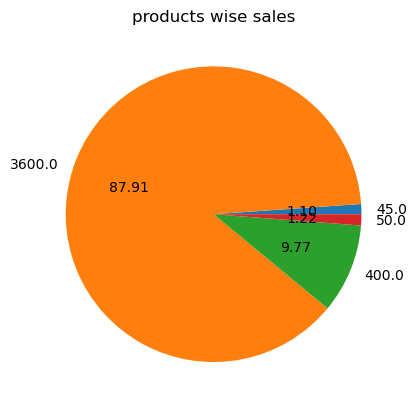

In [220]:
# pie chart
product_sales = df.groupby('Product')['Total'].sum()
plt.pie(product_sales, labels = product_sales, autopct = '%.2f')
plt.title('products wise sales')
plt.show()

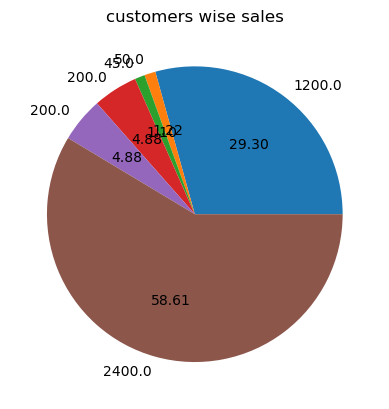

In [224]:
total_purchases = df.groupby(['Customer Name','Product'])['Total'].sum()
plt.pie(total_purchases, labels = total_purchases, autopct = '%.2f')
plt.title("customers wise sales")
plt.show()

In [232]:
# trying basic sales trend
daily_sales = df.groupby('Date')['Total'].sum()
daily_sales

Date
2024-03-01       1200.0
2024-03-04        200.0
2024-03-08        200.0
2024-03-09       2400.0
2024/03/02         50.0
March 3, 2024      45.0
Name: Total, dtype: float64

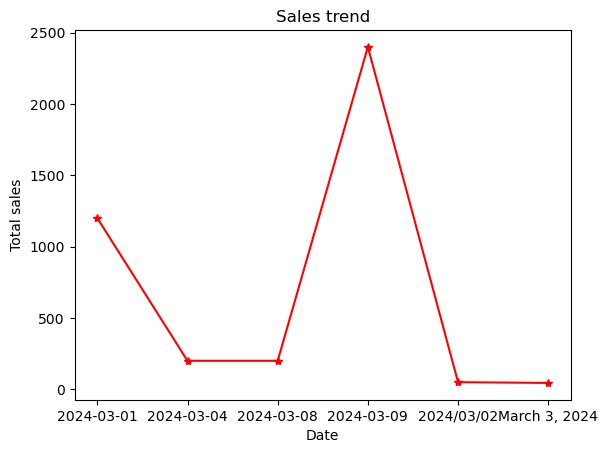

In [236]:
plt.plot(daily_sales.index, daily_sales.values, marker = '*', linestyle = '-', color = 'red')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title("Sales trend")
plt.show()